<a href="https://colab.research.google.com/github/SHAIKYASIR/Current-Daily-Price-of-Various-Commodities-from-Various-Markets-/blob/main/T2_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('/content/drive/MyDrive/CNN/Current Daily Price of Various Commodities from Various Markets.csv')


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the CSV file
file_path = '/content/drive/MyDrive/CNN/Current Daily Price of Various Commodities from Various Markets.csv'

# Step 1: Handle missing values (if any)
# For simplicity, we'll drop rows with missing values
df.dropna(inplace=True)

# Step 2: Convert Arrival_Date to datetime
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d/%m/%Y')

# Step 3: Encode categorical variables
label_encoders = {}
for column in ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 4: Scale numerical features
scaler = StandardScaler()
df[['Min_x0020_Price', 'Max_x0020_Price']] = scaler.fit_transform(df[['Min_x0020_Price', 'Max_x0020_Price']])

# Step 5: Convert the target variable into classes
# Define bins and labels for the target variable
bins = [-float('inf'), df['Modal_x0020_Price'].quantile(0.33), df['Modal_x0020_Price'].quantile(0.66), float('inf')]
labels = ['low', 'medium', 'high']
df['Price_Category'] = pd.cut(df['Modal_x0020_Price'], bins=bins, labels=labels)

# Drop the original target column
df.drop(columns=['Modal_x0020_Price'], inplace=True)

# Display the first few rows of the preprocessed dataframe
df.head()


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Price_Category
0,0,79,520,124,269,0,2024-07-20,-0.533564,-0.609592,low
1,0,163,344,32,212,0,2024-07-20,0.109669,-0.026282,high
2,0,163,483,120,176,0,2024-07-20,-0.111454,-0.139011,medium
3,1,52,102,138,156,0,2024-07-20,-0.595525,-0.490191,low
4,1,122,253,138,156,0,2024-07-20,-0.479348,-0.542867,low


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'Price_Category' is your target variable
X = df.drop(['Price_Category', 'Arrival_Date'], axis=1)  # Drop the 'Arrival_Date' column
y = df['Price_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a classifier (e.g., Random Forest)
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9897523484201537


In [19]:
# Assuming 'Price_Category' is your target variable
X = df.drop(['Price_Category', 'Arrival_Date'], axis=1)  # Drop the 'Arrival_Date' column
y = df['Price_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a classifier (e.g., Random Forest)
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9910333048676345


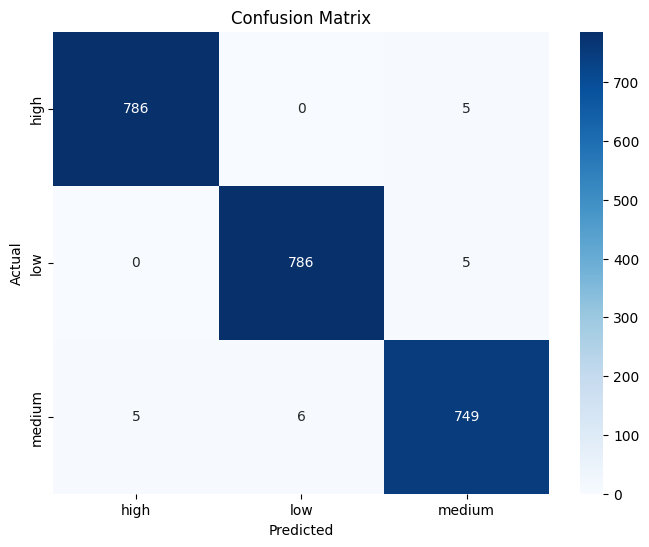

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()